In [9]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt

sns.set()

In [5]:
#Importing the Datasets
train = pd.read_csv(r"E:\Python All in One\DATA_SETS\Airplane Crash Data\train.csv")
test = pd.read_csv(r"E:\Python All in One\DATA_SETS\Airplane Crash Data\test.csv")

In [6]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


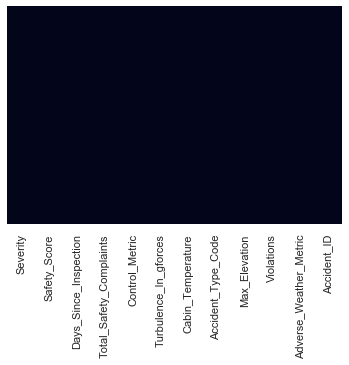

In [7]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

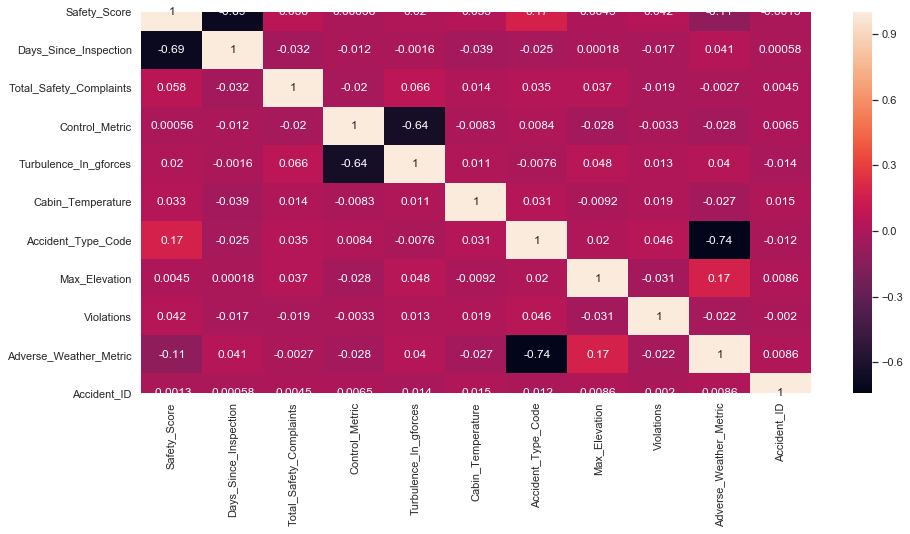

In [10]:
#Checking variable correlations
pt.figure(figsize = (15, 7))
sns.heatmap(train.corr(), annot = True)

In [11]:
train.shape

(10000, 12)

In [12]:
#Separating the dependent and independent variables
x = train.iloc[:,1:12].values
y = train.iloc[:, 0].values

In [35]:
#Splitting the training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [36]:
#Applying Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### Applying Principal Component Analysis to find n_components

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.17456336 0.15187444 0.13909044 0.09512424 0.09245434 0.08980091
 0.08859461 0.08684434 0.03236855 0.02940627 0.0198785 ]


# Linear Discriminant Analysis

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [39]:
lda = LDA(n_components = 6)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

C:\Users\Gaurav SINGH\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 4 - 1) = 3 components.
  ChangedBehaviorWarning)
C:\Users\Gaurav SINGH\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', 
                                   random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8715
